# The Loss Function for Logistic Regression 

## 1. Uncertainty

In [1]:
import numpy as np
from PIL import Image # Python Imaging Library 'pillow'

#### Q: How many bytes do we need to store a 200x200 pixel B/W image?

* bit = 0 or 1
* byte = 8 bits
* 200 * 200 bits or that / 8 bytes

In [3]:
200 * 200 / 8  # 5000 byte or 5 kB

5000.0

In [14]:
X = np.random.randint(0, 256, size=(200, 200), dtype=np.uint8) # <-- single byte
X.shape  # <-- most important debugging command with Numpy / Scikit / pandas

(200, 200)

In [15]:
X[X<=127] = 0
X[X>127] = 1

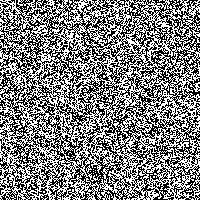

In [16]:
im = Image.fromarray(X * 255)
im

In [17]:
im.save('blur.png')

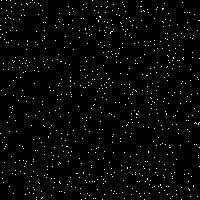

In [29]:
X = np.random.randint(0, 256, size=(200, 200), dtype=np.uint8)
X[X<=250] = 0
X[X>250] = 1
im = Image.fromarray(X * 255)
im

In [30]:
im.save('sparse.png')

In [31]:
!ls -l *.png

-rw-rw-r-- 1 kristian kristian 9087 Jan 22 10:14 blur.png
-rw-rw-r-- 1 kristian kristian 1406 Jan 22 10:21 sparse.png


### We measure uncertainty by how well the data can be compressed

## 2. Information Entropy

**aka Shannon Entropy**

*a measure for uncertainty in data (your target variable)*

$H(y) = -\sum_i p(y_i) * log_2(p(y_i))$

The entropy H(y) tells us how much uncertainty there is.

The Unit of H are **bits**

In [36]:
from math import log

p_gentoo = 0.5
p_adelie = 0.5

- ( p_gentoo * log(p_gentoo, 2) + p_adelie * log(p_adelie, 2) ) 

1.0

### What are we trying to do when training a model?

* there exists a real probability distribution Q(y) of the target
* unpleasant fact: we don't know Q(y)
* we try to get as close to Q(y) with our model P(y)

* our model can at best have the same uncertainty as the real distribution
* possibly the model is worse

can we measure how close we are to the real distribution/uncertainty?

we can calculate the difference

$P(y) - Q(y)$

for a **sample** of Q(y). The sample is our training data.

**we want to make the difference between $P(y)$ and $Q_{sample}(y)$ as small as possible**

![](oss.png)

## 3. Measuring Errors of a LogReg model

**we want the equivalent of MSE for logistic regression**

* floating-point number
* differentiable, so we can optimize it
* quantifies the residual uncertainty for our training sample
* smaller is better

$log loss = -\sum y_T * log(\hat p) + (1-y_T) * log(1-\hat p)$

**LogLoss or binary cross-entropy**

$y_T$ - the real target label (0 or 1)

$\hat p$ - the probability from our model (the output of the sigmoid function)

In [49]:
# model probs
#p_hat = [0.01, 0.99, 0.5, 0.7999]  # <-- m.predict(Xtrain)
p_hat = [0.01, 0.99, 0.5, 0.7999]  # <-- m.predict(Xtrain)
y_true = [0.0, 1.00, 1.0, 0.00]    # <-- ytrain

In [50]:
#TODO: implement the log-loss equation
logloss = 0
for i in range(0,len(p_hat)):
    logloss += log(p_hat[i])*y_true[i] + (1-y_true[i])*log(1-p_hat[i])
-logloss

46.05170287714106

In [43]:
from sklearn.metrics import log_loss

log_loss(np.array(y_true), np.array(p_hat))

0.5805464724148495

**Logistic Regression** is running an algorithm called Gradient Descent
that finds the parameters giving the minimum log-loss for a sample.

**Note:** there is always one minimum (unless your data is multi-colinear)

### Also see:

* Kullback-Leibler Divergence
* maximum likelihood (alternative way to explain logloss)
* AIC (Akaike Information Criterion) - for comparing models